Please do one of the following.


# Part I: Classification

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
Default=pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [3]:
def get_binary(y):
    if y=='Yes':
        return 1
    if y=='No':
        return 0
Default['default']=Default['default'].apply(get_binary)
Default['student']=Default['student'].apply(get_binary)

Default['default']=Default['default'].astype('category')
Default['student']=Default['student'].astype('category')
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0    10000 non-null int64
default       10000 non-null category
student       10000 non-null category
balance       10000 non-null float64
income        10000 non-null float64
dtypes: category(2), float64(2), int64(1)
memory usage: 254.2 KB


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

In [4]:
del Default['Unnamed: 0']

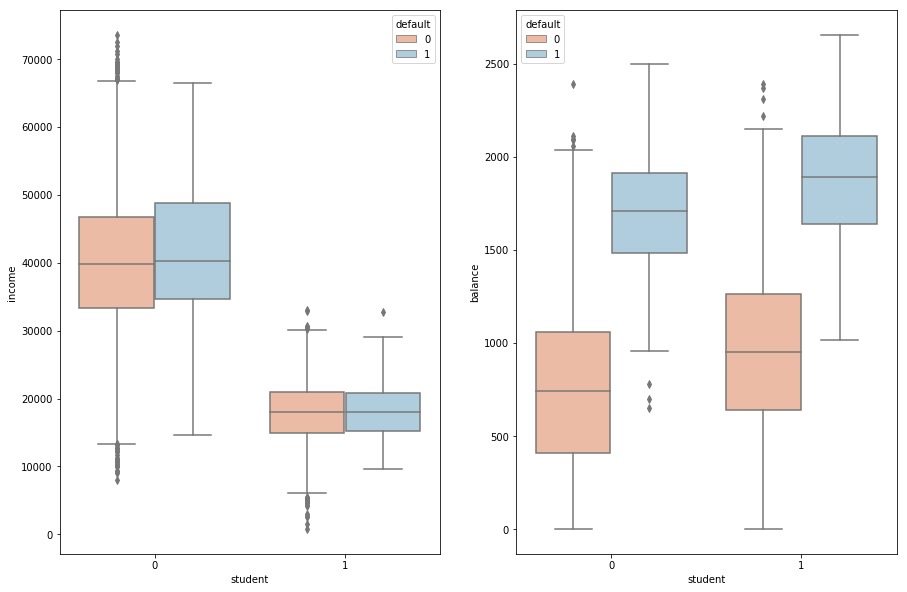

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.boxplot(x="student", y="income", hue="default", data=Default, palette="RdBu")
plt.subplot(1, 2, 2)
sns.boxplot(x="student", y="balance", hue="default", data=Default, palette="RdBu")

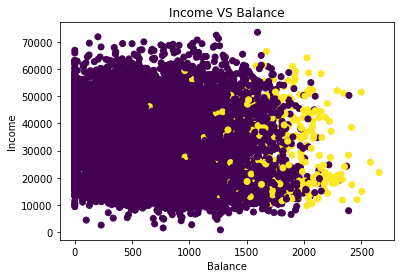

In [6]:
# # Create plot

colors = Default["default"]
plt.scatter(Default['balance'],Default['income'],c = colors)
plt.title('Income VS Balance')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [7]:
Default.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
train,test=train_test_split(Default,test_size=0.2,random_state=123)
X_train=train[['balance','income']]
y_train=train['default']
X_test=test[['balance','income']]
y_test=test['default']



logisticRegr = LogisticRegression(penalty='l1')
logisticRegr.fit(X_train,y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

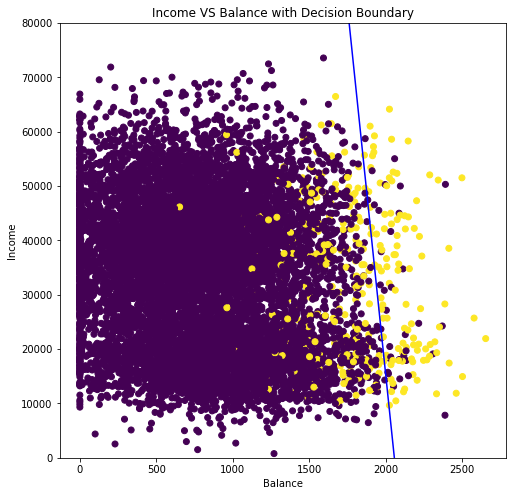

In [9]:
coef=logisticRegr.coef_
weight=coef[0]
intercept=logisticRegr.intercept_

# decision boundary

fig, ax = plt.subplots(figsize=(8, 8))
p = np.arange(0, 2600, 1)
q = (intercept+weight[0]*p)/-weight[1]

colors = Default["default"]
plt.scatter(Default['balance'],Default['income'],c = colors)

plt.plot(p, q, c='blue')
plt.ylim(0, 80000)
plt.title('Income VS Balance with Decision Boundary')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

In [10]:
def get_ROCplot(fpr,tpr,roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

Area under the ROC curve : 0.959372


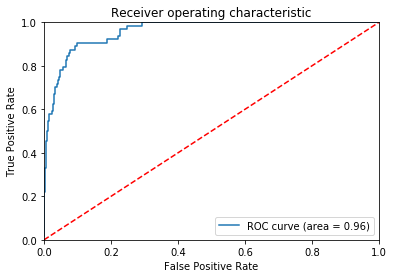

In [11]:
# #compute AUC ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,logit_roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

In [21]:
train,test=train_test_split(Default,test_size=0.2,random_state=123)
X_train=train[['balance','income','student']]
y_train=train['default']
X_test=test[['balance','income','student']]
y_test=test['default']

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

Area under the ROC curve : 0.960235


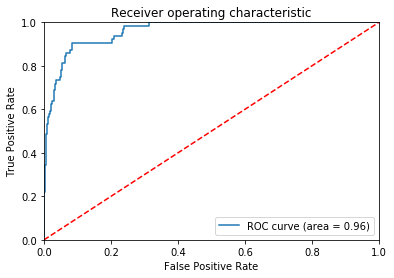

In [23]:
logisticRegr_ridge = LogisticRegression(penalty='l2')
logisticRegr_ridge.fit(X_train,y_train)
logit_roc_auc = roc_auc_score(y_test, logisticRegr_ridge.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr_ridge.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,logit_roc_auc)

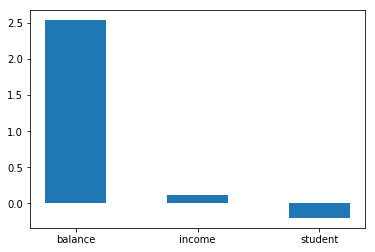

The coefficients: [[ 2.5378071   0.10926638 -0.20156427]]


In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), logisticRegr_ridge.coef_[0],0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income','student'))
rects = ax.patches
plt.show()
print ('The coefficients:',logisticRegr_ridge.coef_)

## Ans: 

After adding student variable, we have to scale the data to reduce the variance of our parameters. Choose panelty l2 as ridge to opimize logistic regression. We notice AUC increase a little bit compared with the model built in 4)

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

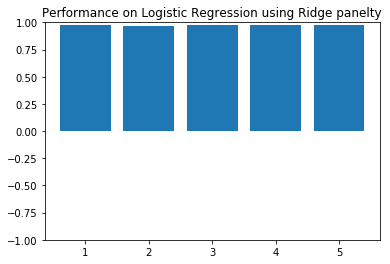

In [16]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logisticRegr_ridge,X_train,y_train,cv=5)
plt.ylim([-1,1])
plt.title('Performance on Logistic Regression using Ridge panelty')
plt.bar(list(range(1,6)),scores)
plt.show()

## Ans:

By looking at the graph, we can see the score under different folds are almost the same. Therefore we conclude the model we built in 5) is robust

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

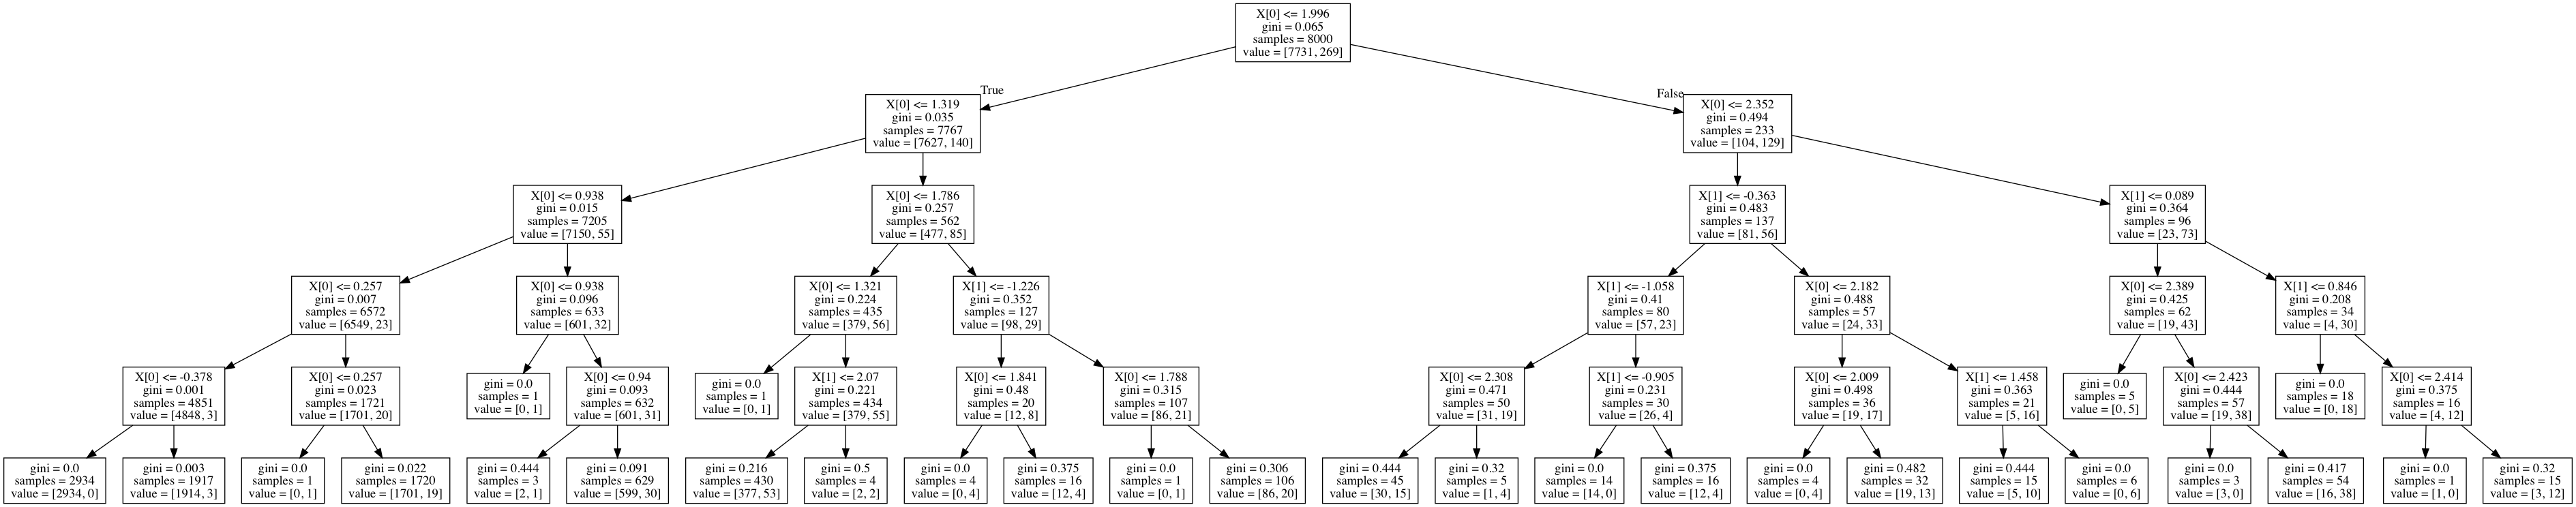

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image



treeclf=DecisionTreeClassifier(max_depth=5)
treeclf.fit(X_train,y_train)


dot_data=export_graphviz(treeclf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Area under the ROC curve : 0.928658


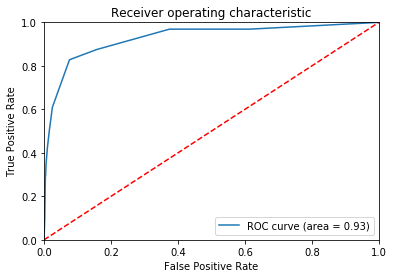

In [18]:
roc_auc = roc_auc_score(y_test, treeclf.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, treeclf.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,roc_auc)

## Ans:

The area under ROC curve reduces to 0.928658, which means performance of decision tree with depth 5 is worse than that of logistic regression. 

8) Find the optimal decision tree depth and compute the AUC ROC. 

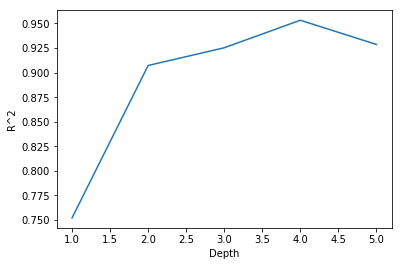

In [19]:
depths = range(1,6)
train_errors=[]
scores=[]
for n in depths:
    clf = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    clf.fit(X_train, y_train)
    train_errors.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
    scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
plt.ylabel('AUC')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]

Area under the ROC curve : 0.953303


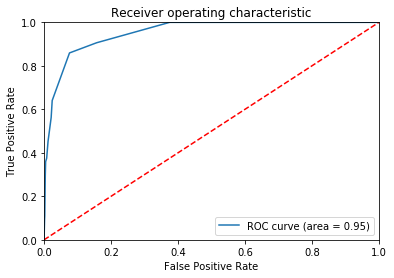

In [20]:
treeclf=DecisionTreeClassifier(max_depth=4)
treeclf.fit(X_train,y_train)


roc_auc = roc_auc_score(y_test, treeclf.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, treeclf.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,roc_auc)

# Part II: Recommendation Systems. 

In this problem we will use the notebook https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/matrix_factorization_recommender.ipynb  as
a starting point.

1) Split the ratings matrix `R_df` into training and testing sets. Remember we need to do this for rows and columns now. 

2) Evaluate the performance of the matrix factorization model for $K=50$. In particular, measure the:
 - Precision.
 - Recall. 

You can round up or down to the nearest integer for the ratings. 

3) Construct an item/item and user/user model, and evaluate the performance as in 2). How does it compare?

4) Check how your answer to 3) changes (if at all) as you try different values of K for K=10, 20, 100. 